In [93]:
#linear regression algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
tesla=pd.read_csv("TSLA.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [95]:
features=["Adj Close", "Volume"]
data=tesla.dropna(subset=features)
data=tesla[features].copy()
data.head()

,Adj Close,Volume
0,23.889999,18766300
1,23.830000,17187100
2,21.959999,8218800
3,19.200001,5139800
4,16.110001,6866900


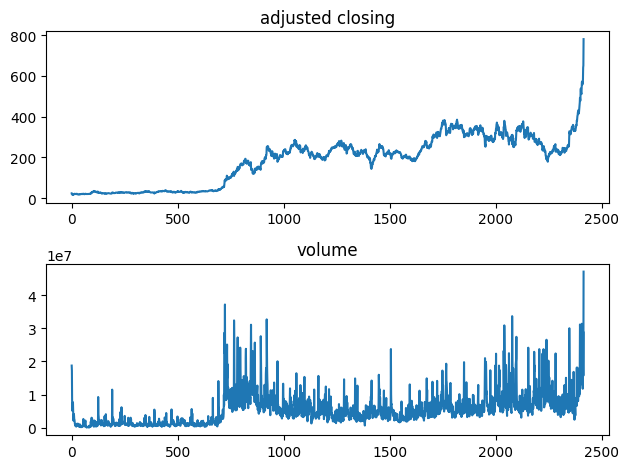

In [96]:
#visualization of data
fig,(ax1,ax2)=plt.subplots(2,1)

ax1.plot(data["Adj Close"])
ax1.set_title("adjusted closing")

ax2.plot(data["Volume"])
ax2.set_title("volume")
plt.tight_layout()


In [97]:
#normalization of data using lambda function
data_normalized=lambda x: ((x-np.min(x))/(np.max(x)-np.min(x)))*9+1
data_normalized=data_normalized(data)
data_normalized.head()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axi

,Adj Close,Volume
0,1.095276,4.574925
1,1.094569,4.272180
2,1.072546,2.552889
3,1.040042,1.962621
4,1.003651,2.293719


In [98]:

import seaborn as sns

Text(0.5, 0, 'Adjusted closing')

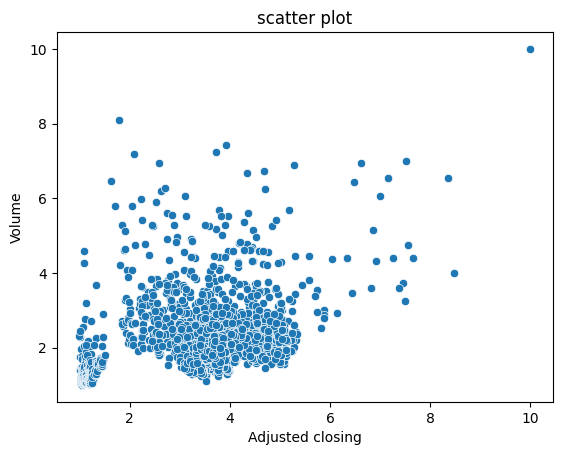

In [99]:
#scatter plot of the data using seaborn
sns.scatterplot(x="Adj Close", y="Volume", data=data_normalized)

plt.title("scatter plot")
plt.ylabel("Volume")
plt.xlabel("Adjusted closing")

In [100]:
#50 days moving average of the data


In [101]:
#splitting the data using the test train split
window_size=50
data_normalized["moving average(50)"]=data_normalized["Adj Close"].rolling(window=window_size, min_periods=1).mean()
data_normalized.head(50)

,Adj Close,Volume,moving average(50)
0,1.095276,4.574925,1.095276
1,1.094569,4.272180,1.094923
2,1.072546,2.552889,1.087464
3,1.040042,1.962621,1.075608
4,1.003651,2.293719,1.061217
5,1.000000,2.304225,1.051014
6,1.019550,2.455616,1.046519
7,1.018843,1.753813,1.043060
8,1.014721,1.399519,1.039911
9,1.027558,1.491078,1.038676


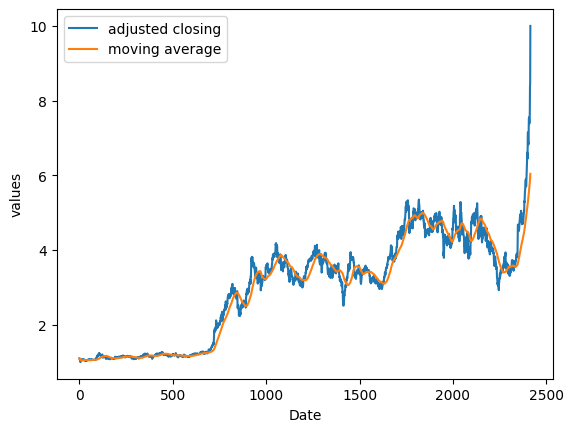

In [102]:
sns.lineplot(x=data_normalized.index,y="Adj Close", data=data_normalized, label="adjusted closing")
sns.lineplot(x=data_normalized.index,y="moving average(50)", data=data_normalized, label="moving average")

plt.xlabel("Date")
plt.ylabel("values")
plt.legend()

In [103]:
"""
splitting the data into testing and training data
80 percent of tthe data will be used for training and remaining 20% for testing the model
"""
from sklearn.model_selection import train_test_split
features=data_normalized.drop(columns=["moving average(50)", "Volume"])
target = data_normalized["Adj Close"]

x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.2, random_state=42)

#printing the shape of trianing and testing data
print("train data shape:", x_train.shape)
print("test data shape:", x_test.shape)

train data shape: (1932, 1)
test data shape: (484, 1)


In [104]:
print(x_train, y_train)

      Adj Close
1666   3.984297
1563   3.122808
544    1.175831
1025   3.446912
821    2.944975
...         ...
1638   3.342214
1095   3.670911
1130   3.416292
1294   3.820008
860    2.233054

[1932 rows x 1 columns] 1666    3.984297
1563    3.122808
544     1.175831
1025    3.446912
821     2.944975
          ...   
1638    3.342214
1095    3.670911
1130    3.416292
1294    3.820008
860     2.233054
Name: Adj Close, Length: 1932, dtype: float64


In [105]:
"""
splitting the data into testing and training data
50 percent of tthe data will be used for training and remaining 20% for testing the model
"""
from sklearn.model_selection import train_test_split
features=data_normalized.drop(columns=["Volume", "Adj Close"])
target = data_normalized["Adj Close"]

x_train2, x_test2, y_train2, y_test2=train_test_split(features, target, test_size=0.05)

#printing the shape of trianing and testing data
print("train data shape:", x_train2.shape)
print("test data shape:", x_test2.shape)

train data shape: (2295, 1)
test data shape: (121, 1)


In [106]:
#training the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


In [107]:
test_dataframe=pd.DataFrame({"test data": y_test,
                            "predicted data":y_pred})
test_dataframe

,test data,predicted data
410,1.184781,1.184781
199,1.104227,1.104227
1670,4.108663,4.108663
1934,4.679142,4.679142
1036,3.867940,3.867940
...,...,...
1423,2.922010,2.922010
1458,3.780084,3.780084
281,1.109055,1.109055
1804,4.884768,4.884768


In [108]:
#accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error

def accuracy( y_test, y_pred):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("MAE:", format(mae, ".9f"))
    print("MSE:", format(mse, ".9f"))
    print("RMSE:", format(rmse, ".9f"))


accuracy(y_test, y_pred)


MAE: 0.000000000
MSE: 0.000000000
RMSE: 0.000000000


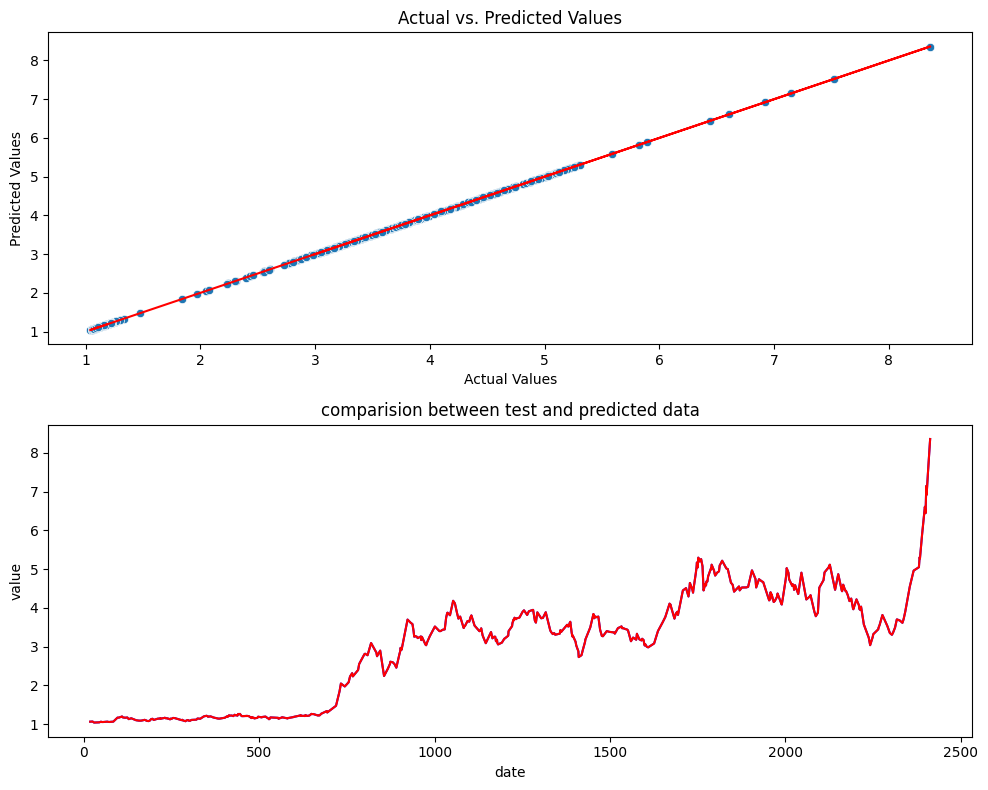

In [109]:
def plot_testdata(test_dataframe, x_test, y_test, y_pred):
    fig,( ax1,ax2)=plt.subplots(2,1, figsize=(10,8))
    sns.scatterplot(data=test_dataframe, x="test data", y="predicted data", ax=ax1)
    #sns.lineplot(data=test_dataframe, x="test data", y="predicted data",ax=ax1)
    ax1.plot(x_test, y_pred, color="red", label="predicted data")
    #ax1.plot(x_test, y_test, color="blue", label="original data")
    # Add labels and title
    ax1.set_xlabel("Actual Values")
    ax1.set_ylabel("Predicted Values")
    ax1.set_title("Actual vs. Predicted Values")
    
    sns.lineplot(data=test_dataframe,x=test_dataframe.index, y="test data",ax=ax2,color="blue")
    sns.lineplot(data=test_dataframe,x=test_dataframe.index, y="predicted data",ax=ax2, color="red")
    ax2.set_xlabel("date")
    ax2.set_ylabel("value")
    ax2.set_title("comparision between test and predicted data")
    plt.tight_layout()
    plt.show()

plot_testdata(test_dataframe, x_test,y_test, y_pred)

In [110]:
test_dataframe.head(100)

,test data,predicted data
410,1.184781,1.184781
199,1.104227,1.104227
1670,4.108663,4.108663
1934,4.679142,4.679142
1036,3.867940,3.867940
...,...,...
900,2.811541,2.811541
1385,3.607315,3.607315
964,3.250824,3.250824
1068,3.722259,3.722259


In [111]:
#now for the data with test train split 50-50

In [112]:
model.fit(x_train2,y_train2)
y_pred2=model.predict(x_test2)

In [113]:
test_dataframe2=pd.DataFrame({"test data": y_test2,
                            "predicted data":y_pred2})
test_dataframe2

,test data,predicted data
1593,3.196886,3.311080
1714,4.376590,4.100309
294,1.093392,1.153985
1611,2.992908,3.213957
223,1.119655,1.137536
...,...,...
2080,4.359042,4.563716
2142,4.466213,4.874249
1018,3.371421,3.385740
1859,4.449490,4.939295


In [114]:
accuracy(y_test2, y_pred2)

MAE: 0.181238923
MSE: 0.071435261
RMSE: 0.267273756


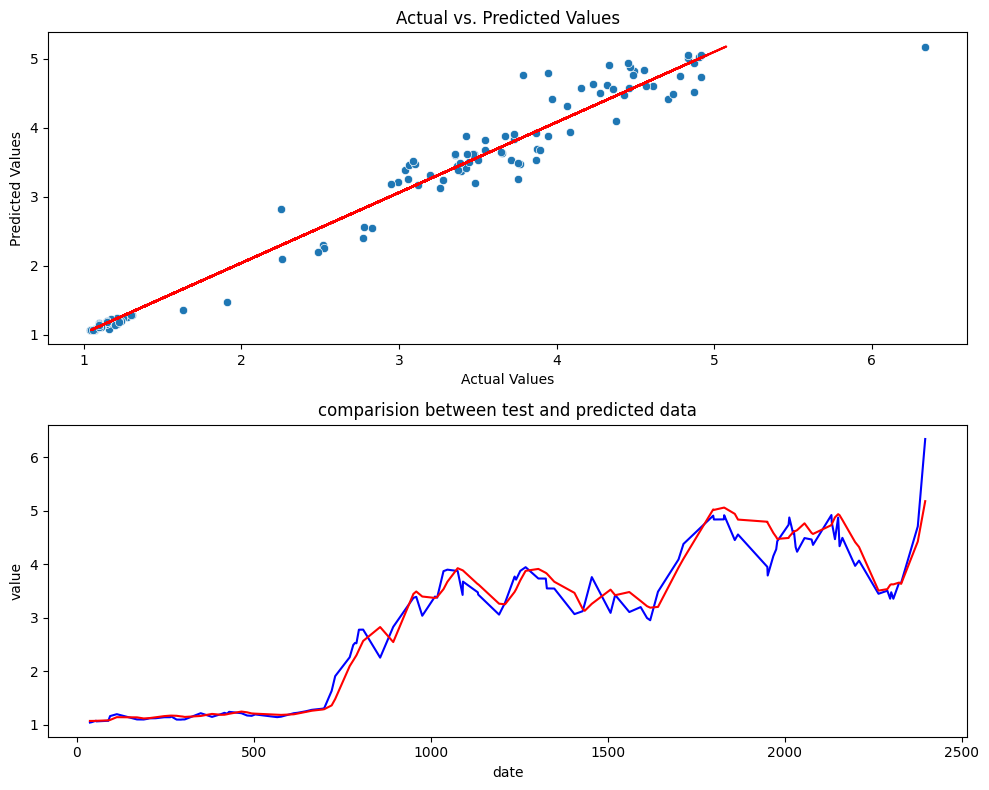

In [115]:
plot_testdata(test_dataframe2, x_test2, y_test2, y_pred2)